In [21]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
# Loading the csv data to a pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [9]:
# Printing first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
gold_data.shape

(2290, 6)

In [16]:
# Checking null values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
# Getting statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [29]:
#correlation
#1.positive correlation 2.Negative
correlation = gold_data.select_dtypes(include='number').corr()


<Axes: >

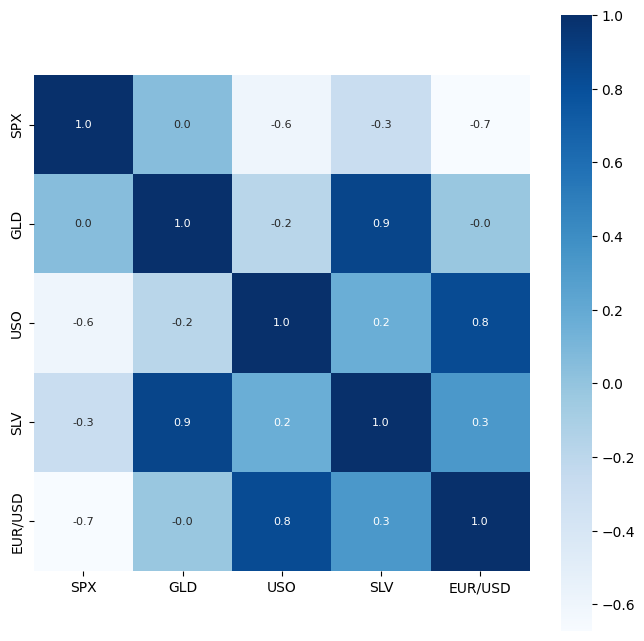

In [30]:
#constructing heatmap to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')

In [31]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Test\AppData\Local\Temp\ipykernel_9712\375920903.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

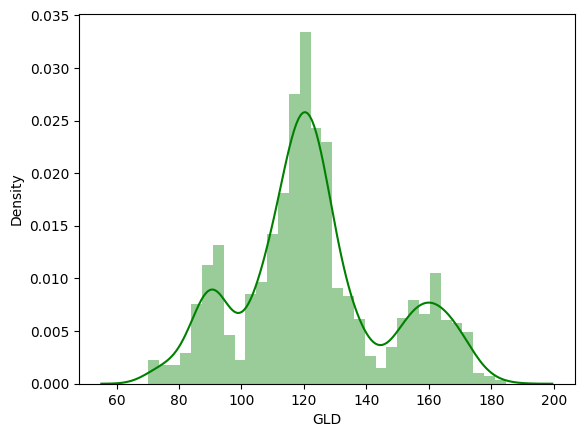

In [32]:
# checking the distributions of the GLD price
sns.distplot(gold_data['GLD'],color='green')


In [33]:
#splitting the features and target
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [34]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [35]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [36]:
#splitting into Training data and Test data
X_train, X_test, Y_train,Y_test =train_test_split(X,Y, test_size=0.2,random_state=2)


In [37]:
#Model Training:Random Forest Regressor
regressor=RandomForestRegressor(n_estimators=100)

In [38]:
#taining the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [39]:
#Model Evaluation
# prediction on test data
test_data_prediction=regressor.predict(X_test)

In [40]:
print(test_data_prediction)

[168.52779941  82.15869993 115.96830049 127.78180051 120.50980147
 154.84269785 150.2275984  125.99270019 117.39439893 126.11060042
 116.73650091 171.28670091 141.56849921 167.78979874 115.18249992
 117.45130061 138.0675036  169.9687008  159.31040247 158.95759957
 155.07420036 125.19769993 176.52399973 157.26870362 125.28380023
  93.53859959  77.55140013 120.62009977 119.1345995  167.51679975
  88.11580073 125.29640007  91.01490058 117.68530032 121.2068991
 135.99790089 115.41800121 114.9433006  146.24509994 107.06130089
 104.31490218  87.04809774 126.33430066 117.94090011 153.51079899
 119.60050022 108.3755999  107.97119877  93.12960059 127.13439785
  74.07580085 113.62769938 121.22400009 111.09179921 118.80339891
 120.88889923 159.18109993 168.14970091 146.98509689  85.66179836
  94.23140021  86.8456989   90.5082     119.11270052 126.52640103
 127.64960014 169.33220027 122.2163996  117.27609856  98.49540041
 168.54010032 143.56529896 131.95810249 121.18550232 121.11139945
 119.651800

In [41]:
#R squared error
error_score=metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9891285376048923


In [42]:
#Comparing the actual values and Predicted values in a plot
Y_test=list(Y_test)

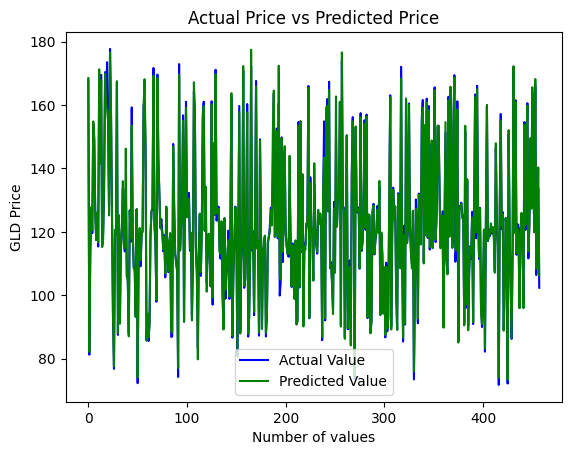

In [46]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()